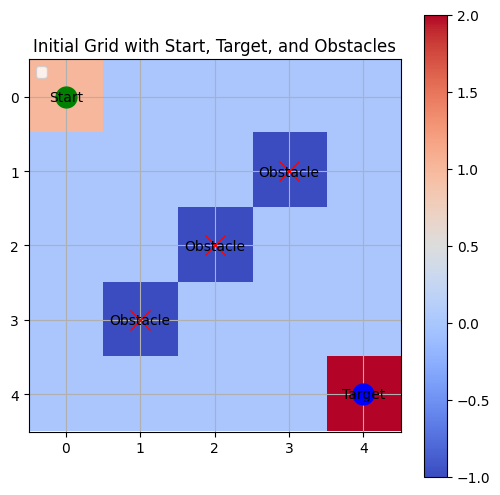


Episode 1:
State: (0, 0), Action: up, Reward: -1, New State: (0, 0)
State: (0, 0), Action: up, Reward: -1, New State: (0, 0)
State: (0, 0), Action: left, Reward: -1, New State: (0, 0)
State: (0, 0), Action: right, Reward: -1, New State: (0, 1)
State: (0, 1), Action: left, Reward: -1, New State: (0, 0)
State: (0, 0), Action: up, Reward: -1, New State: (0, 0)
State: (0, 0), Action: left, Reward: -1, New State: (0, 0)
State: (0, 0), Action: up, Reward: -1, New State: (0, 0)
State: (0, 0), Action: down, Reward: -1, New State: (1, 0)
State: (1, 0), Action: up, Reward: -1, New State: (0, 0)
State: (0, 0), Action: up, Reward: -1, New State: (0, 0)
State: (0, 0), Action: down, Reward: -1, New State: (1, 0)
State: (1, 0), Action: up, Reward: -1, New State: (0, 0)
State: (0, 0), Action: right, Reward: -1, New State: (0, 1)
State: (0, 1), Action: right, Reward: -1, New State: (0, 2)
State: (0, 2), Action: right, Reward: -1, New State: (0, 3)
State: (0, 3), Action: left, Reward: -1, New State: (0

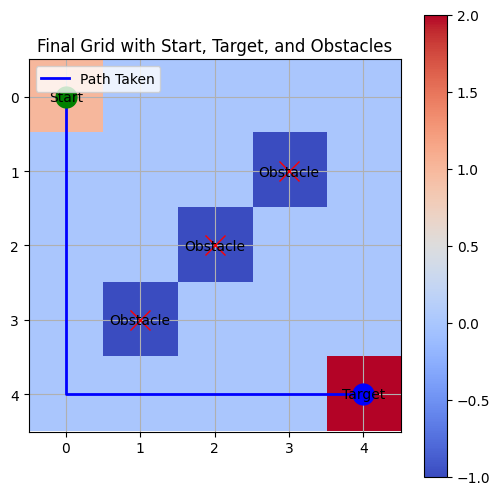

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
grid_size = 5  # Size of the grid
num_episodes = 100  # Increased number of episodes for better training
actions = ["up", "down", "left", "right"]  # Possible actions
Q_table = np.zeros((grid_size, grid_size, len(actions)))  # Q-table initialization

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.8  # Initial exploration rate
epsilon_decay = 0.99  # Decay factor for exploration rate
min_epsilon = 0.1  # Minimum exploration rate

# Positions
start = (0, 0)  # Starting position
target = (grid_size - 1, grid_size - 1)  # Target position
obstacles = [(2, 2), (1, 3), (3, 1)]  # List of obstacle positions

# Helper functions
def get_new_position(pos, action):
    """Calculate the new position based on the current position and action."""
    x, y = pos
    if action == "up" and x > 0:
        x -= 1
    elif action == "down" and x < grid_size - 1:
        x += 1
    elif action == "left" and y > 0:
        y -= 1
    elif action == "right" and y < grid_size - 1:
        y += 1
    return (x, y)

def get_action(state):
    """Choose action based on epsilon-greedy policy."""
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(len(actions)))  # Explore
    else:
        return np.argmax(Q_table[state[0], state[1], :])  # Exploit

# Initial grid display with obstacles, start, and target
def display_grid(grid, title, path=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="coolwarm", origin="upper")
    plt.title(title)
    plt.colorbar()

    # Plot path if provided
    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, 'b-', linewidth=2, label='Path Taken')

    # Mark start position
    plt.plot(start[1], start[0], 'go', markersize=15)  # Start position
    plt.text(start[1], start[0] + 0.1, 'Start', ha='center', va='bottom')

    # Mark target position
    plt.plot(target[1], target[0], 'bo', markersize=15)  # Target position
    plt.text(target[1], target[0] - 0.1, 'Target', ha='center', va='top')

    # Mark obstacles
    for obs in obstacles:
        plt.plot(obs[1], obs[0], 'rx', markersize=15)  # Obstacles marked with 'x'
        plt.text(obs[1], obs[0] + 0.1, 'Obstacle', ha='center', va='bottom')

    # Add a legend
    plt.legend(loc='upper left')
    plt.xticks(np.arange(grid_size))
    plt.yticks(np.arange(grid_size))
    plt.grid(True)
    plt.show()

# Prepare initial grid for display
initial_grid = np.zeros((grid_size, grid_size))
initial_grid[start] = 1  # Mark start position
initial_grid[target] = 2  # Mark target position
for obs in obstacles:
    initial_grid[obs] = -1  # Mark obstacles

display_grid(initial_grid, "Initial Grid with Start, Target, and Obstacles")

# Training loop with step limit
max_steps_per_episode = 500  # Max steps to prevent infinite loops

for episode in range(num_episodes):
    state = start  # Reset to start for each episode
    step_count = 0  # Counter for steps taken in the episode

    print(f"\nEpisode {episode + 1}:")

    while state != target and step_count < max_steps_per_episode:
        action_index = get_action(state)  # Get action based on current policy
        action = actions[action_index]  # Get action name
        new_state = get_new_position(state, action)  # Calculate new state

        # Reward setup
        if new_state == target:
            reward = 100
        elif new_state in obstacles:
            reward = -100
            new_state = state  # Stay in place if hitting an obstacle
        else:
            reward = -1

        # Q-learning update
        best_future_q = np.max(Q_table[new_state[0], new_state[1], :])
        current_q = Q_table[state[0], state[1], action_index]
        Q_table[state[0], state[1], action_index] = (1 - alpha) * current_q + alpha * (reward + gamma * best_future_q)

        # Print episode details
        print(f"State: {state}, Action: {action}, Reward: {reward}, New State: {new_state}")

        state = new_state  # Move to new state
        step_count += 1  # Increment step count

    # Epsilon decay for exploration strategy
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    if step_count >= max_steps_per_episode:
        print("Max steps reached, ending episode.")

# Testing the learned policy
state = start  # Reset to start position for testing
path = [state]  # List to store the path taken
max_test_steps = 500  # Maximum steps to prevent infinite loops during testing
step_count = 0  # Counter for steps taken in testing

while state != target and step_count < max_test_steps:
    action_index = np.argmax(Q_table[state[0], state[1], :])  # Choose best action
    state = get_new_position(state, actions[action_index])  # Move to new state
    path.append(state)  # Add new state to path
    step_count += 1  # Increment step count

# Check if the target was reached
if state == target:
    print("Reached the target!")
else:
    print("Max steps reached without reaching the target.")

# Final path visualization
final_grid = np.zeros((grid_size, grid_size))
final_grid[target] = 2  # Target position
for obs in obstacles:
    final_grid[obs] = -1  # Obstacles

# Display initial grid again for consistency
display_grid(initial_grid, "Final Grid with Start, Target, and Obstacles", path)

Learned Q-values:
[[88.26511968 89.19408138 87.91053175]
 [90.03211866 88.39087486 88.16772369]
 [86.41031887 89.40007503 77.32284245]
 [89.70354542 87.49021277 88.27409504]
 [87.53966278 89.16769181 88.06004691]
 [87.07880008 79.10207559 79.27774569]
 [79.35409702 89.24005835 88.10649883]
 [77.97720807 76.78610512 89.17173977]
 [76.07111249 77.3356363  78.5844935 ]]


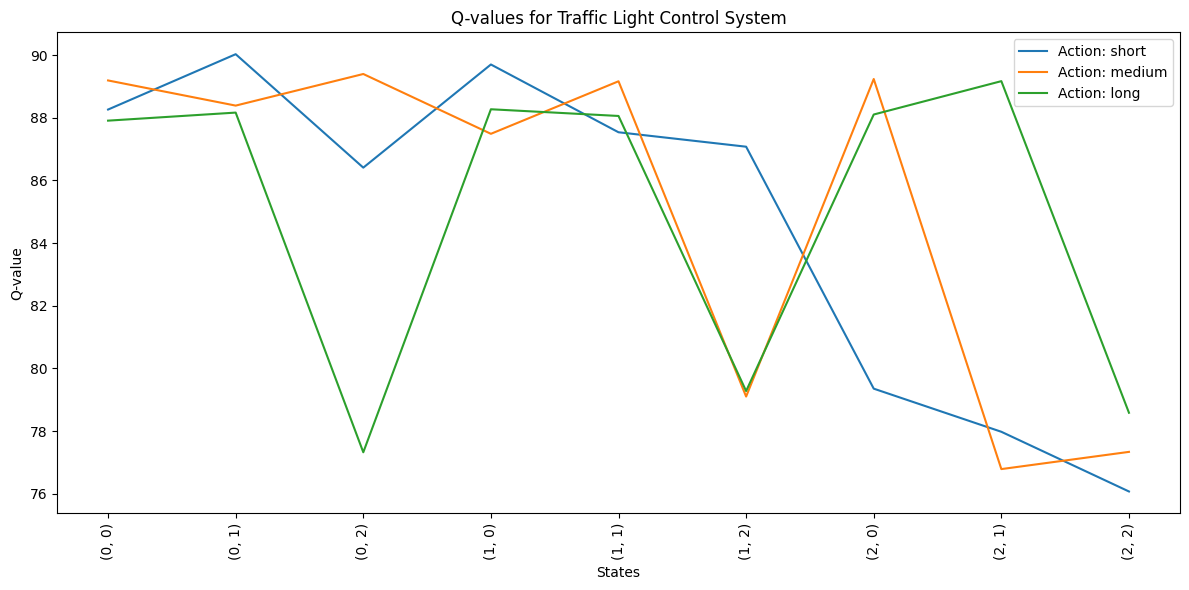

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define parameters
num_episodes = 1000
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor
epsilon = 0.1   # Exploration rate

# State space: (number of vehicles in direction A, number of vehicles in direction B)
states = [(low, high) for low in range(3) for high in range(3)]  # 0: Low, 1: Medium, 2: High
actions = ['short', 'medium', 'long']  # Action: green light durations
q_table = np.zeros((len(states), len(actions)))

# Reward function
def get_reward(state, action):
    vehicles_a, vehicles_b = state
    if action == 'short':
        wait_time = vehicles_a + 1
    elif action == 'medium':
        wait_time = vehicles_a + vehicles_b
    else:  # 'long'
        wait_time = vehicles_b + 1

    # Positive reward for reducing wait times, negative for congestion
    if wait_time < 3:
        return 10  # Reward for low wait time
    elif wait_time > 5:
        return -10  # Penalty for high congestion
    else:
        return -1  # Small penalty for moderate congestion

# Function to choose an action based on epsilon-greedy policy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        state_index = states.index(state)
        return actions[np.argmax(q_table[state_index])]  # Exploit

# Q-Learning algorithm
for episode in range(num_episodes):
    state = random.choice(states)  # Start with a random state
    done = False
    steps = 0  # Counter to prevent infinite loop

    while not done and steps < 100:  # Limit number of steps per episode
        steps += 1
        action = choose_action(state)
        reward = get_reward(state, action)

        # Transition to the next state
        next_state = (random.randint(0, 2), random.randint(0, 2))  # Random next state for simplicity

        # Update Q-values
        state_index = states.index(state)
        next_state_index = states.index(next_state)
        q_table[state_index][actions.index(action)] += alpha * (reward + gamma * np.max(q_table[next_state_index]) - q_table[state_index][actions.index(action)])

        state = next_state  # Move to the next state

# Display the learned Q-values
print("Learned Q-values:")
print(q_table)

# Plotting the Q-values for visualization
plt.figure(figsize=(12, 6))
for action_index, action in enumerate(actions):
    plt.plot(q_table[:, action_index], label=f'Action: {action}')
plt.xlabel('States')
plt.ylabel('Q-value')
plt.title('Q-values for Traffic Light Control System')
plt.xticks(ticks=np.arange(len(states)), labels=[f"{state}" for state in states], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Episode 0: Total Reward = -45
Episode 100: Total Reward = -65
Episode 200: Total Reward = -40
Episode 300: Total Reward = -5
Episode 400: Total Reward = -5
Episode 500: Total Reward = -50
Episode 600: Total Reward = -5
Episode 700: Total Reward = -5
Episode 800: Total Reward = -5
Episode 900: Total Reward = -5


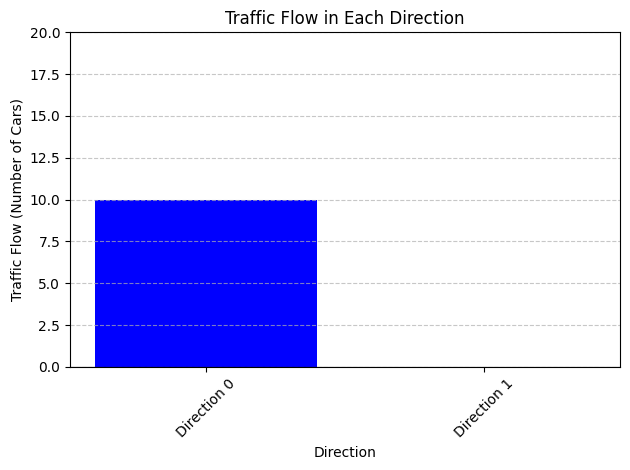

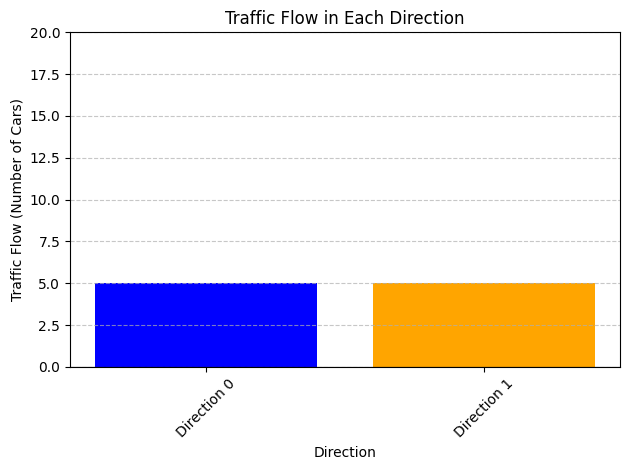

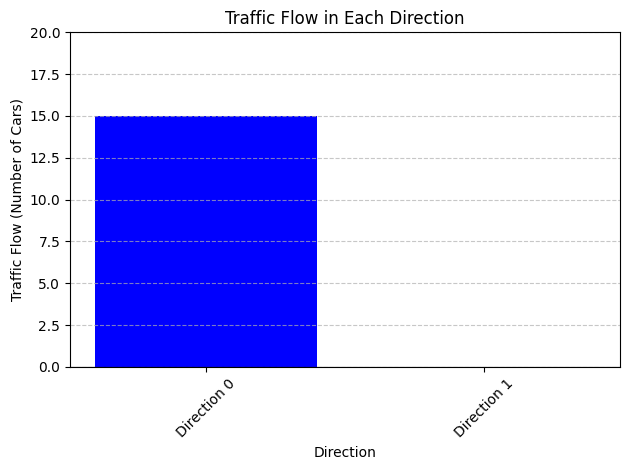

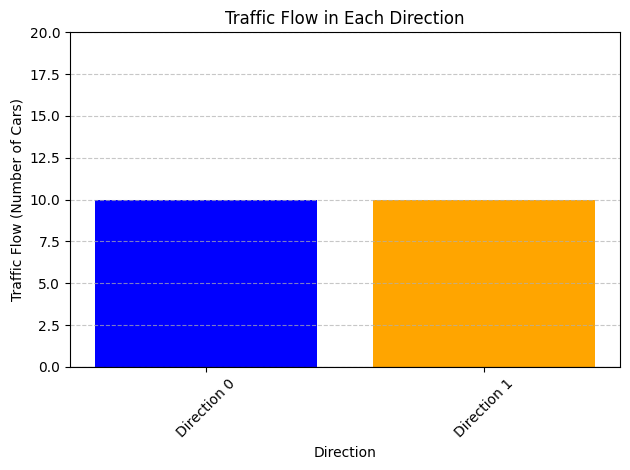

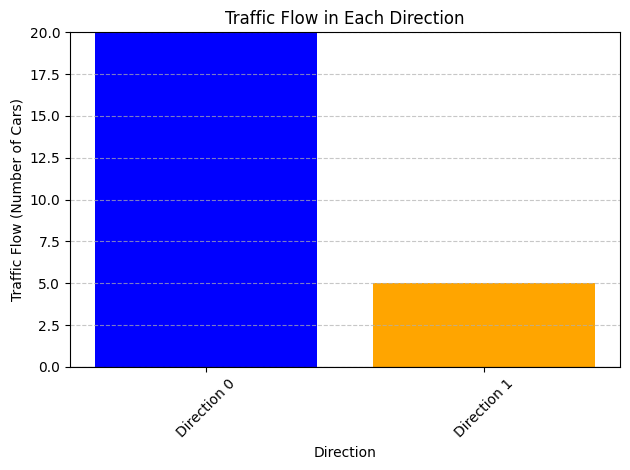

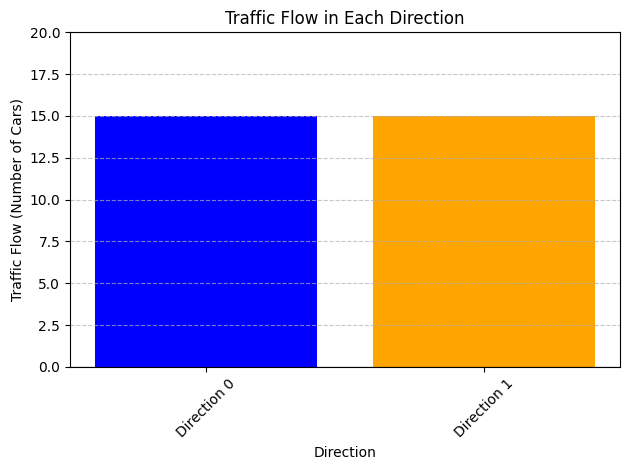

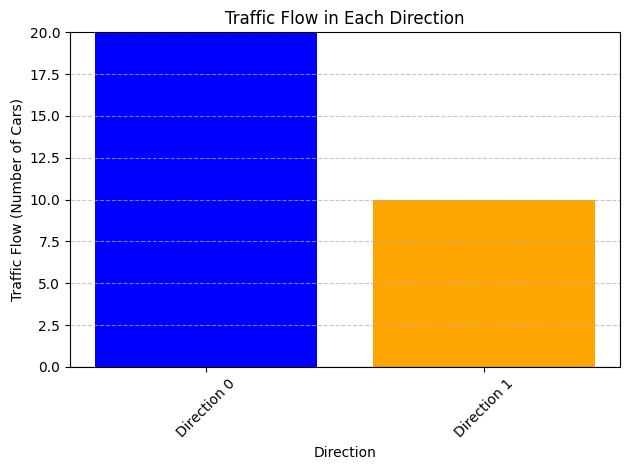

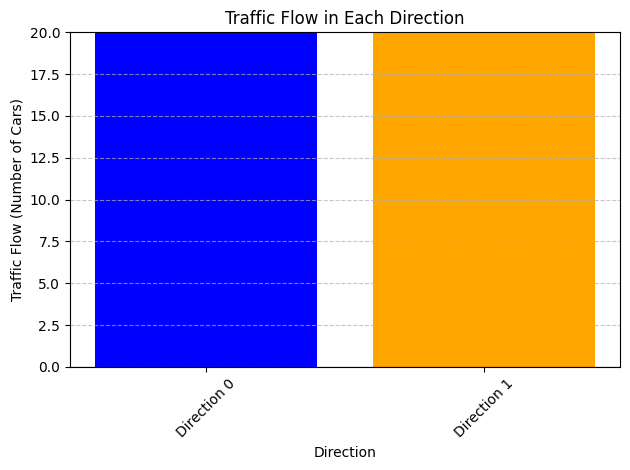

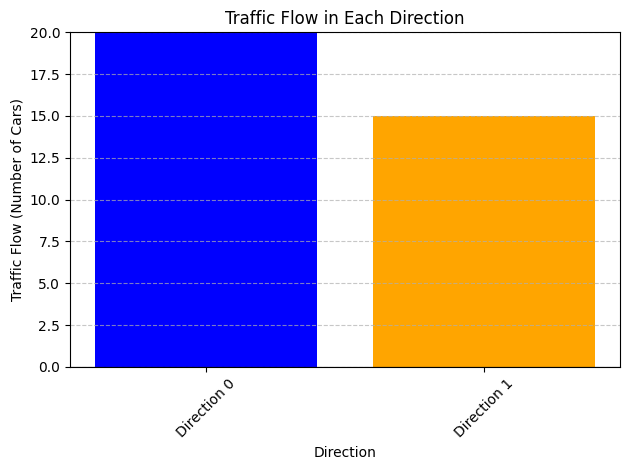

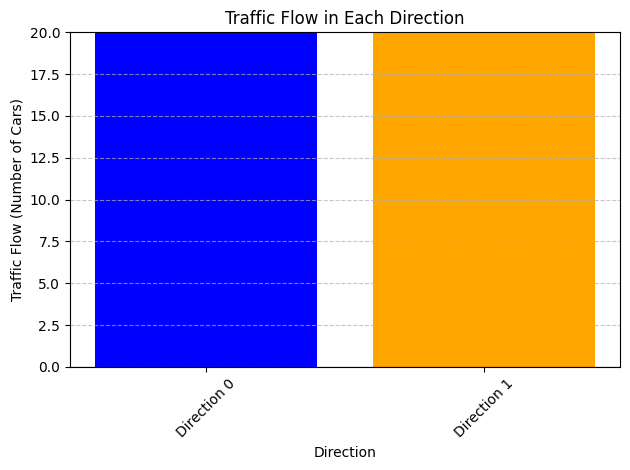

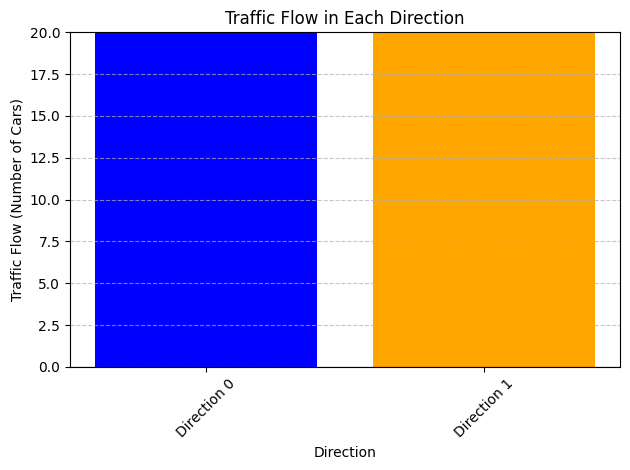

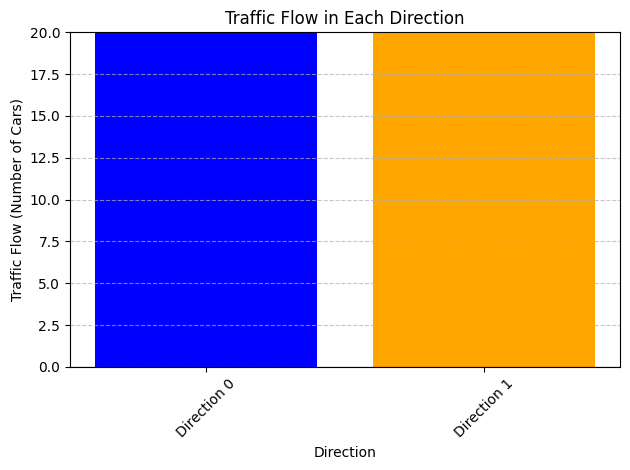

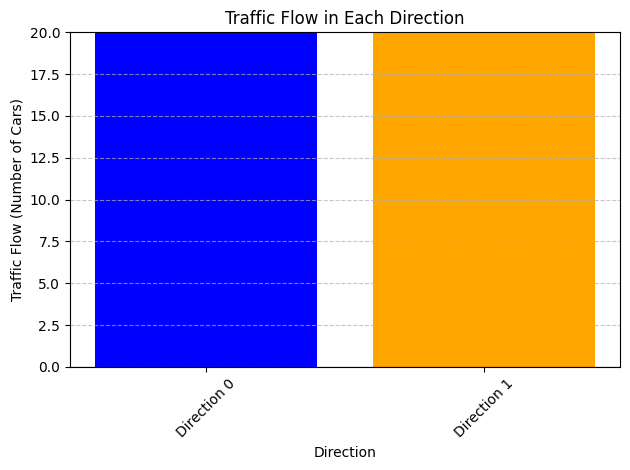

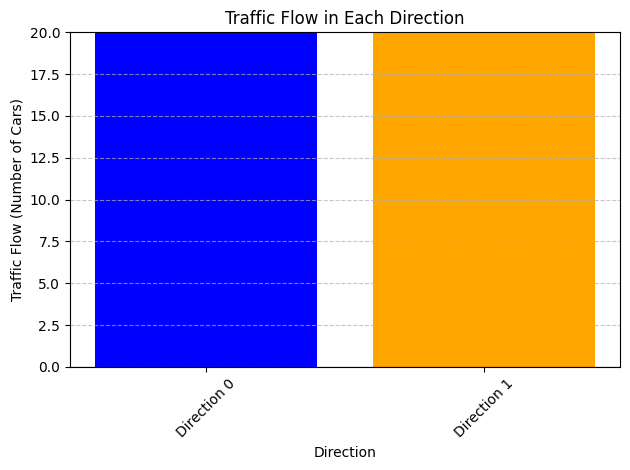

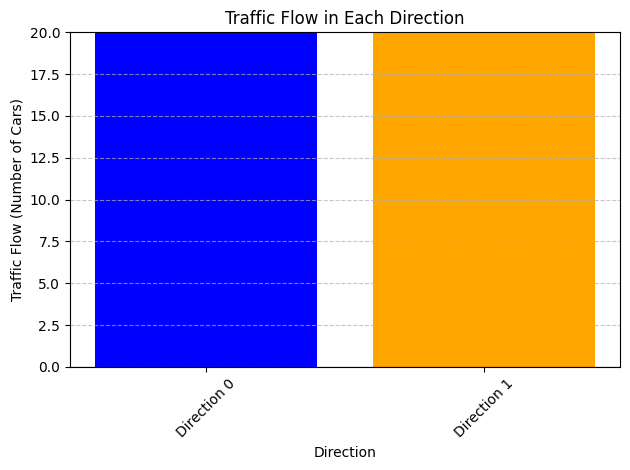

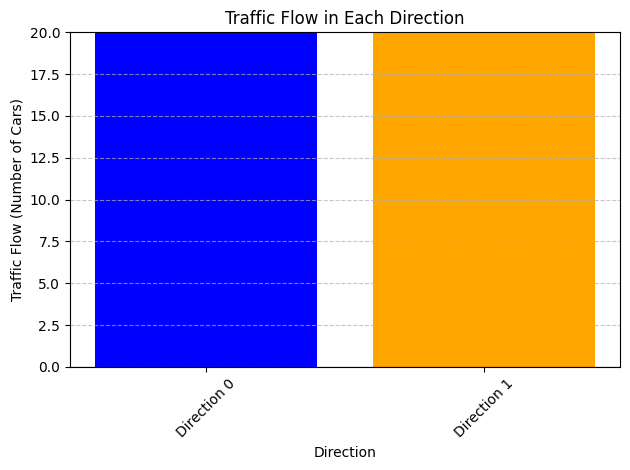

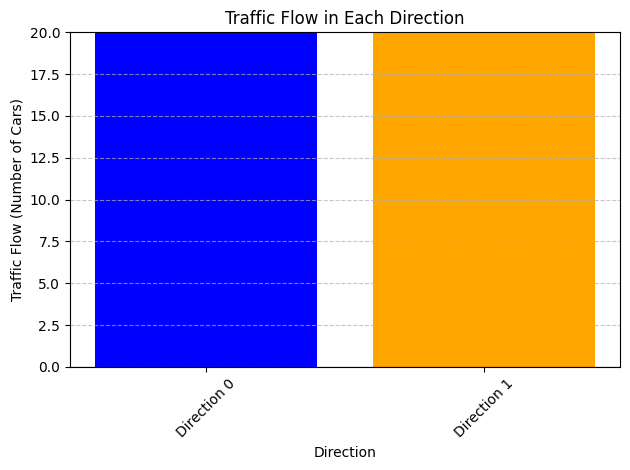

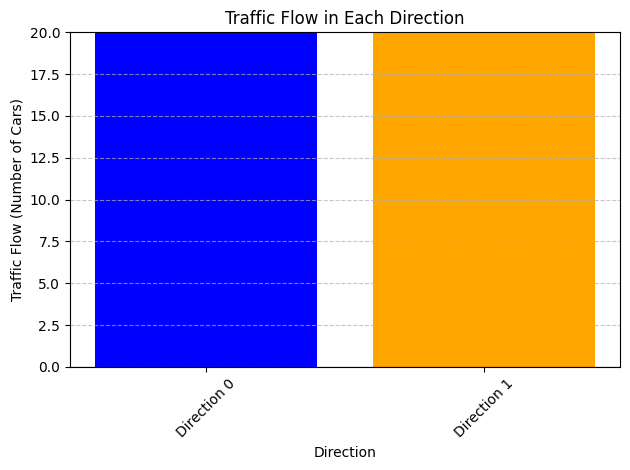

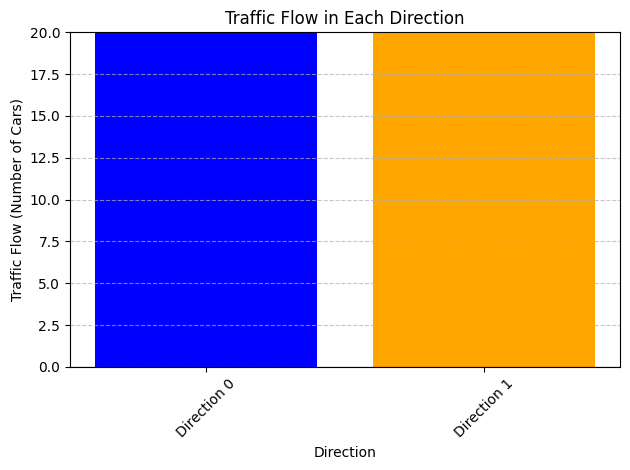

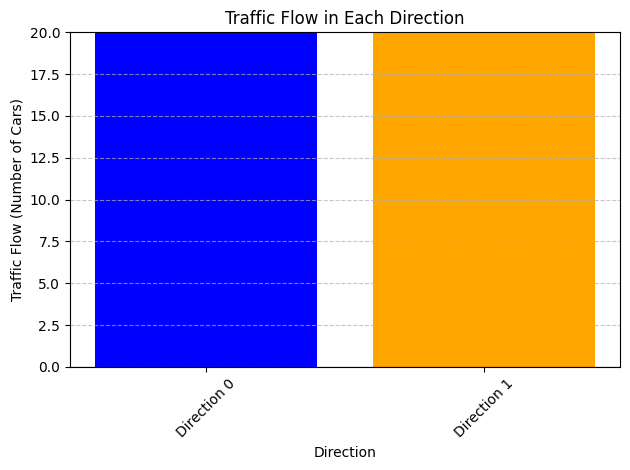

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class TrafficSignalEnvironment:
    def __init__(self, max_steps=20):
        self.state = None
        self.traffic_flow = [0, 0]  # Flow in each direction (Direction 0 and Direction 1)
        self.signals = [0, 0]  # Signal timings for two directions
        self.max_signal_time = 10  # Maximum time for a signal
        self.done = False
        self.max_steps = max_steps  # Maximum steps per episode
        self.steps_taken = 0  # Track steps taken in the current episode

    def reset(self):
        self.state = np.random.randint(0, 2)  # Random initial state (0 or 1)
        self.signals = [0, 0]
        self.traffic_flow = [0, 0]  # Reset traffic flow
        self.done = False
        self.steps_taken = 0  # Reset step counter
        return self.state

    def step(self, action):
        # Set signal timings based on the action
        self.signals[action] = self.max_signal_time

        # Simulate traffic flow based on signal timings
        if action == 0:  # Green for direction 0
            self.traffic_flow[0] += self.max_signal_time
            self.traffic_flow[1] -= self.max_signal_time // 2  # Some cars may flow in the opposite direction
        else:  # Green for direction 1
            self.traffic_flow[1] += self.max_signal_time
            self.traffic_flow[0] -= self.max_signal_time // 2

        # Calculate the reward (negative congestion)
        reward = -np.sum(np.maximum(0, -np.array(self.traffic_flow)))  # Reward is negative congestion

        # Update state (simulate next state based on flow)
        self.state = 1 - self.state  # Toggle state between 0 and 1

        # Increment steps taken
        self.steps_taken += 1

        # Check if maximum steps are reached to end the episode
        if self.steps_taken >= self.max_steps:
            self.done = True

        return self.state, reward, self.done

    def render(self):
        # Render the traffic signal and flow
        plt.bar(['Direction 0', 'Direction 1'], self.traffic_flow, color=['blue', 'orange'])
        plt.title('Traffic Flow in Each Direction')
        plt.xlabel('Direction')
        plt.ylabel('Traffic Flow (Number of Cars)')
        plt.ylim(0, 20)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.axhline(0, color='black', linewidth=0.8)  # Add a line at y=0 for better visibility
        plt.tight_layout()
        plt.show()

class QLearningAgent:
    def __init__(self, learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0, min_exploration_rate=0.01, exploration_decay=0.995):
        self.q_table = np.zeros((2, 2))  # Two states (0 and 1) and two actions (0 and 1)
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.min_exploration_rate = min_exploration_rate
        self.exploration_decay = exploration_decay

    def select_action(self, state):
        if np.random.rand() < self.exploration_rate:
            return np.random.randint(0, 2)  # Explore
        else:
            return np.argmax(self.q_table[state])  # Exploit

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action]
        self.q_table[state][action] += self.learning_rate * (td_target - self.q_table[state][action])

    def train(self, env, episodes=1000):
        for episode in range(episodes):
            state = env.reset()
            total_reward = 0
            while True:
                action = self.select_action(state)
                next_state, reward, done = env.step(action)
                self.update_q_table(state, action, reward, next_state)
                total_reward += reward
                state = next_state
                if done:
                    break

            # Decay exploration rate
            self.exploration_rate = max(self.min_exploration_rate, self.exploration_rate * self.exploration_decay)

            if episode % 100 == 0:
                print(f'Episode {episode}: Total Reward = {total_reward}')

# Initialize environment and agent
env = TrafficSignalEnvironment(max_steps=20)  # Set max_steps to your desired value
agent = QLearningAgent()

# Train the agent
agent.train(env, episodes=1000)

# Test the trained agent
state = env.reset()
done = False
while not done:
    action = np.argmax(agent.q_table[state])
    next_state, reward, done = env.step(action)
    env.render()
    state = next_state
